<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150">

# Earth Data Science Corps Summer 2020

![Colored Bar](colored-bar.png)

## Introduction to Using Spatial Vector Data in Open Source Python

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Fundamentals of Vector Data in Python 

In this lesson, you will learn fundamental concepts related to working with vector data in **Python**, including understanding the spatial attributes of vector data, how to open vector data and access its metadata.


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Describe the characteristics of 3 key vector data structures: points, lines and polygons.
* Open a shapefile in **Python** using **geopandas** - `gpd.read_file()`.
* Plot a shapfile in **Python** using **geopandas** - `gpd.plot()`.

</div>

Add this reading as a to do for all of the info below so we are not duplicating information 
Reading: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/ 

## About Spatial Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices determines the type of vector that you are working 
with. There are three types of vector data: 

* **Points:** Each individual point is defined by a single x, y coordinate. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has defined `x, y` location.

* **Polygons:** A polygon consists of 3 or more vertices that are connected and "closed". Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. 
<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png" alt="There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)."></a>
    <figcaption> There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)
    </figcaption>
</figure>


## Introduction to the Shapefile Data Format Which Stores Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` 
format. Because the structure of points, lines, and polygons are 
different, each individual shapefile can only contain one vector 
type (all points, all lines or all polygons). You will not find 
a mixture of point, line and polygon objects in a single shapefile.

Objects stored in a shapefile often have a set of associated 
`attributes` that describe the data. For example, a line 
shapefile that contains the locations of streams, might 
contain the associated stream name, stream "order" and other 
information about each stream line object.

* More about shapefiles can found on 
<a href="https://en.wikipedia.org/wiki/Shapefile" target="_blank">Wikipedia</a>.

## Common Data Stored as Spatial Vector Data

Vector data is a very common way to store multiple types of data. Some common examples include:

- census data
- roads
- political boundaries
- water bodies and river systems
- ecological boundaries
- city locations
- specific object locations (i.e., stream gauges)

This is a very cursory and incomplete list, but helps demonstrate how versatile this data format can be. 

## Import Shapefiles

You will use the **geopandas** library to work with vector data in 
**Python**. You will also use `matplotlib.pyplot` to plot your data. 

In [1]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

# Get data and set working directory
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip')
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

The shapefiles that you will import are:

* A polygon shapefile representing outlines of countries globally.
* A line shapefile representing political boundaries of countries globally.
* A point shapefile representing the location of highly populated places globally.

To import shapefiles you use the `geopandas` function `read_file()`. Notice that you call the `read_file()` function using `gpd.read_file()` to tell python to look for the function within the `geopandas` library.


In [2]:
# Define path to file
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_10m_admin_0_countries", "ne_10m_admin_0_countries.shp")

bounday_lines_path = os.path.join("data", "earthpy-downloads",
                                  "ne_50m_admin_0_boundary_lines_land", "ne_50m_admin_0_boundary_lines_land.shp")

# Import shapefile using geopandas

# Opening polygon shapefile
countries = gpd.read_file(countries_path)

# Opening line shapefile
boundary_lines = gpd.read_file(bounday_lines_path)


## Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it.
Shapefile attributes are similar to fields or columns in a spreadsheet. Each row
in the spreadsheet has a set of columns associated with it that describe the row
element. In the case of a shapefile, each row represents a spatial object - for
example, a road, represented as a line in a line shapefile, will have one "row"
of attributes associated with it.

<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png" alt="A shapefile has an associated attribute table. Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate .dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object. Image Source: National Ecological Observatory Network (NEON)"></a>
    <figcaption>Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>


You can view the attribute table associated with our geopandas `GeoDataFrame` by typing the object name into the console (e.g., `countries`). 

Or you can use the `.head(3)` method to display the first 3 rows of the attribute table. Adding a number fo the head method like this: `.head(6)` will specify how many rows of data python displays. 


In [3]:
# View top 6 rows of attribute table
countries.head(6)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Admin-0 country,0,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,아르헨티나,Argentinië,Argentyna,Argentina,Аргентина,Argentina,Arjantin,Argentina,阿根廷,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."


In [4]:
# View the geometry type of each row
countries.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3           Polygon
4      MultiPolygon
           ...     
250    MultiPolygon
251         Polygon
252         Polygon
253         Polygon
254         Polygon
Length: 255, dtype: object

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Vector Metadata

The spatial and attribute data are not the only important aspects of a shapefile. The metadata of a shapefile are also very important. The metadata includes data on the Coordinate Reference System (CRS), the extent, and much more. For more information on what the metadata is, and how to access it, see the full lesson on vector data on the Earth Lab website, [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/).</div>

## Plotting Vector Data with GeoPandas

Once your vector data is successfully loaded into a GeoDataFrame with GeoPandas, it's very easy to plot the data with the GeoPandas function `plot()`. This helps to visually demonstrate the data stored in a GeoDataFrame. Below is the data we opened above plotted out. 

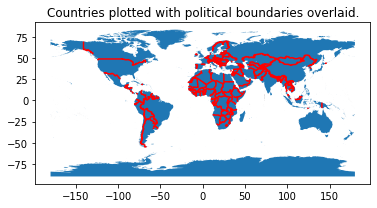

In [5]:
# Using matplotlib to plot the two GeoDataFrames on the same axes (ax)
fig, ax = plt.subplots()

countries.plot(ax=ax)
boundary_lines.plot(ax=ax, color='red');
ax.set(title="Countries plotted with political boundaries overlaid.");

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge : Open and Plot Spatial Data in Python

Much like was done above, you're going to open your own spatial data with `geopandas`! Below we've provided a path to a dataset that contains spatial data similar to what we opened above. Open the spatial data with `geopandas`. Name the dataset `populated_places`. Once the dataset is opened, check the `geom_type`, and view the first few rows of the dataset using `dataset.head()`. 

</div>

In [6]:
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple", "ne_50m_populated_places_simple.shp")

# Open your dataset below this line. Make sure to view the geom_type and the first few rows of the dataset



The cell below includes a set of tests to see if you correctly completed the activity in the cell above. They will provide you with feedback that can help you complete the activity. 

Be sure to run the cell below to check your code (please do not modify the cell!).

In [7]:
# Run this cell to ensure soap_plot_locations was created correctly

import notebook_tests_data_types

try:
    print(notebook_tests_data_types.test_geopandas_dataframe_creation(
        populated_places)
    )
except NameError:
    print("'populated_places' is not defined. Make sure you spelled the variable name correctly!")

'populated_places' is not defined. Make sure you spelled the variable name correctly!


Now that the data is open, you can plot is using the `plot()` function. Copy the code below, but enter in your variable name to see the data you've opened plotted. Make sure to customize the title of the code, and change the color of your data to make the map more legible. 

```
fig, ax = plt.subplots()

countries.boundary.plot(ax=ax)
your_dataframe_here.plot(ax=ax, color='blue');
ax.set(title="Put Title Here");
```

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> BONUS Challenge: Clipping Vector Data in Python

You may have noticed that the data above is difficult to read since there are so many points in the point data layer. One of the most common analytical techniques used in earth data science is clipping vector data. A clip is a spatial operation that will take a dataset, and limit it spatially to the extent of another dataset. 

<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/vector-clip.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/vector-clip.png" alt="When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI"></a>
    <figcaption>When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI
    </figcaption>
</figure>

For further reading on what clipping is, you can refer to the clipping page on the Earth Lab website, [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/clip-vector-data-in-python-geopandas-shapely/). Fear not, we will go over clipping and other spatial data operations soon! 

For this bonus challenge, you will clip the data you've opened, `populated_places`, to the extent of a single country. To clip the data, you will use the `clip()` function in `geopandas`. The syntax of the function is `gpd.clip(data_to_clip, boundary_to_clip_to)`. You can assign the output of this function to a variable, and it will be a GeoDataFrame of the output of the operation. In the below example, `cities_in_mexico` would be a GeoDataFrame containing all of the points in `populated_places` that were within the boundary of the polygon `mexico_boundary`. 

```
cities_in_mexico = gpd.clip(populated_places, mexico_boundary)

```

We subsetted the `countries` dataset and made a GeoDataFrame that is just the boundary of Indonesia. Use that GeoDataFrame to clip `populated_places` to Indonesia. Name the output `cities_in_indonesia`. 

</div>

In [8]:
# Subsetting the countries dataframe to make Indonesian boundary to clip populated_places to. 
indonesia_boundary = countries.loc[countries['SOVEREIGNT'] == 'Indonesia']

# Below this line clip the populated_places data to the Indonesian boundary created above.


Now run the next cell to see if you properly clipped the data!

Variable 'cities_in_indonesia' not found. Please make sure you assigned it correctly!


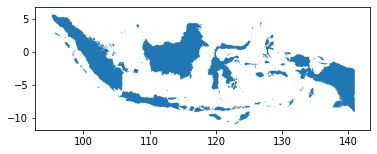

In [9]:
try:
    fig, ax = plt.subplots()

    indonesia_boundary.plot(ax=ax)
    cities_in_indonesia.plot(ax=ax, color='purple')
    ax.set(title="Major Cities in Indonesia");
    
except NameError:
    print("Variable 'cities_in_indonesia' not found. Please make sure you assigned it correctly!")